In [1]:
# cloning GitHub Repo
!git clone https://github.com/chase-kusterer/BASD.git

# changing directory
import os
repo_name = '/content/BASD/'
os.chdir(repo_name)

# checking results
print(f"Current working directory changed to: {os.getcwd()}")

Cloning into 'BASD'...
remote: Enumerating objects: 110, done.
remote: Counting objects: 100% (110/110), done.
remote: Compressing objects: 100% (96/96), done.
remote: Total 110 (delta 54), reused 32 (delta 9), pack-reused 0 (from 0)
Receiving objects: 100% (110/110), 5.22 MiB | 20.03 MiB/s, done.
Resolving deltas: 100% (54/54), done.
Current working directory changed to: /content/BASD


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h1>Script 05 | Nonparametric Modeling with Regression Trees</h1>
DAT-7470 - Business Analysis with Structured Data<br>
Sample Solution<br><br>

Written by Chase Kusterer - Faculty of Analytics <br>
Hult International Business School <br>
<a href="https://chase-kusterer.github.io/">https://chase-kusterer.github.io/</a> <br><br><br><br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h2>Part I: Preparation and Exploration</h2>
<h4>a) Imports and Initial Setup</h4>
Complete code to import packages and load the dataset into Python.

In [2]:
# importing libraries
import matplotlib.pyplot as plt                      # data visualization
import numpy as np                                   # mathematical essentials
import pandas as pd                                  # data science essentials
from sklearn.model_selection import train_test_split # train-test split
from sklearn.tree import DecisionTreeRegressor       # regression trees
from sklearn.tree import plot_tree                   # tree plots
import warnings                                      # warnings from code


# new libraries
from sklearn.preprocessing import StandardScaler  # standard scaler


# specifying the path and file name
file = './datasets/diamonds_prepped.xlsx'


# reading the file into Python
diamonds = pd.read_excel(io = file,
                         header = 0)


# checking housing dataset
diamonds.head(n = 5)

,carat,color,clarity,cut,price,mall,internet
0,0.32,3,7,0,1375,1,0
1,0.35,5,7,1,1680,1,0
2,0.40,4,7,1,2245,1,0
3,0.59,5,7,0,2495,1,0
4,0.72,7,8,0,2699,1,0


<br>

In [69]:
## x-side ##
x_all  = diamonds.drop(labels = 'price', axis = 1)
x_base = diamonds[ ['carat', 'color', 'clarity', 'cut'] ]

## y-side ##
y_original = diamonds['price']

In [40]:
## x-side ##
x_all  = diamonds.drop(labels = 'price', axis = 1)
x_base = diamonds[ ['carat', 'color'] ]

## y-side ##
y_original = diamonds['price']

In [55]:
## x-side ##
x_all  = diamonds.drop(labels = 'price', axis = 1)
x_base = diamonds[ ['mall','internet', 'clarity', 'cut'] ]

## y-side ##
y_original = diamonds['price']

<br>
<h3>Which set of x-data should we use?</h3>
Are regression trees similar to ordinary least squares where we need to select features based on their significance, or would it be better to give them all available x-data so they can self-optimize? Let's find out!

In [70]:
# x-data
x_data = x_base

# y_data
y_data = y_original

<br>

In [71]:
# train-test split
x_train, x_test, y_train, y_test = train_test_split(x_base,
                                          y_original,
                                          test_size = 0.35,
                                          random_state = 702)

<br>

In [72]:
# checking results
print(f"""
Data Shapes
-----------
x_train: {x_train.shape}
y_train: {y_train.shape}

x_test:  {x_test.shape}
y_test:  {y_test.shape}
""")


Data Shapes
-----------
x_train: (265, 4)
y_train: (265,)

x_test:  (144, 4)
y_test:  (144,)



<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part II: Regression Trees</h2><br>
CART models are very useful in regression problems as they output interesting tools such as <strong>tree plots</strong> and <strong>feature importance</strong>. As they are a nonparametric model type, they have no coefficients. They also <strong>assume no model form</strong>, meaning that theoretically we do not need to transform any features or engineer new ones. CART models are meant to work out of the box.<br><br>

<strong>Key Attributes</strong>

* tend to overfit unless pruned
* tend to be worse at prediction than other model types (after pruning)
* can generate very useful outputs for developing hypotheses and data-driven findings


Run the following code to load a user-defined function for CART model output.

In [73]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.

    PARAMETERS
    ----------
    model  : CART model
    train  : training data (x-side)
    export : whether or not to export as a .png image, default False
    """

    # declaring the number
    n_features = x_train.shape[1]

    # setting plot window
    fig, ax = plt.subplots(figsize=(10, 8))

    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

    if export == True:
        plt.savefig('./analysis_images/Tree Visual.png')

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

Run the following code to develop a regression tree model. Notice that it overfits to the training data as it was allowed to continue growing until it could not grow any further.

In [74]:
model_name = 'Unpruned Regression Tree'

# INSTANTIATING a model object - CHANGE THIS AS NEEDED
model = DecisionTreeRegressor(random_state = 702)


# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results (R-square)
model_train_score = model.score(x_train, y_train)
model_test_score  = model.score(x_test, y_test)
model_gap         = abs(model_train_score - model_test_score)


# displaying results
print('Training Score :', round(model_train_score, ndigits = 4))
print('Testing Score  :', round(model_test_score, ndigits = 4))
print('Train-Test Gap :', round(model_gap, ndigits = 4))

Training Score : 0.9994
Testing Score  : 0.879
Train-Test Gap : 0.1204


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h4>a) Develop a new regression tree.</h4>
Develop a regression tree with a maximum depth of 4 and a minimum number of samples per leaf of 25. The following help file may be useful in approaching this challenge.

In [9]:
help(DecisionTreeRegressor)

Help on class DecisionTreeRegressor in module sklearn.tree._classes:

class DecisionTreeRegressor(sklearn.base.RegressorMixin, BaseDecisionTree)
 |  DecisionTreeRegressor(*, criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0, monotonic_cst=None)
 |
 |  A decision tree regressor.
 |
 |  Read more in the :ref:`User Guide <tree>`.
 |
 |  Parameters
 |  ----------
 |  criterion : {"squared_error", "friedman_mse", "absolute_error",             "poisson"}, default="squared_error"
 |      The function to measure the quality of a split. Supported criteria
 |      are "squared_error" for the mean squared error, which is equal to
 |      variance reduction as feature selection criterion and minimizes the L2
 |      loss using the mean of each terminal node, "friedman_mse", which uses
 |      mean squared error with Fri

<br>

In [75]:
# naming the model
model_name = 'Pruned Regression Tree'

# INSTANTIATING a model object - CHANGE THIS AS NEEDED
model = DecisionTreeRegressor(max_depth = 4,
                              min_samples_leaf  =15,
                              random_state = 702)


# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = round(model.score(x_train, y_train),ndigits=4) # using R-square
model_test_score  = round(model.score(x_test, y_test),4)   # using R-square
model_gap         = round(abs(model_train_score - model_test_score), ndigits=4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 0.8665
Testing Score  : 0.8211
Train-Test Gap : 0.0454


<br>

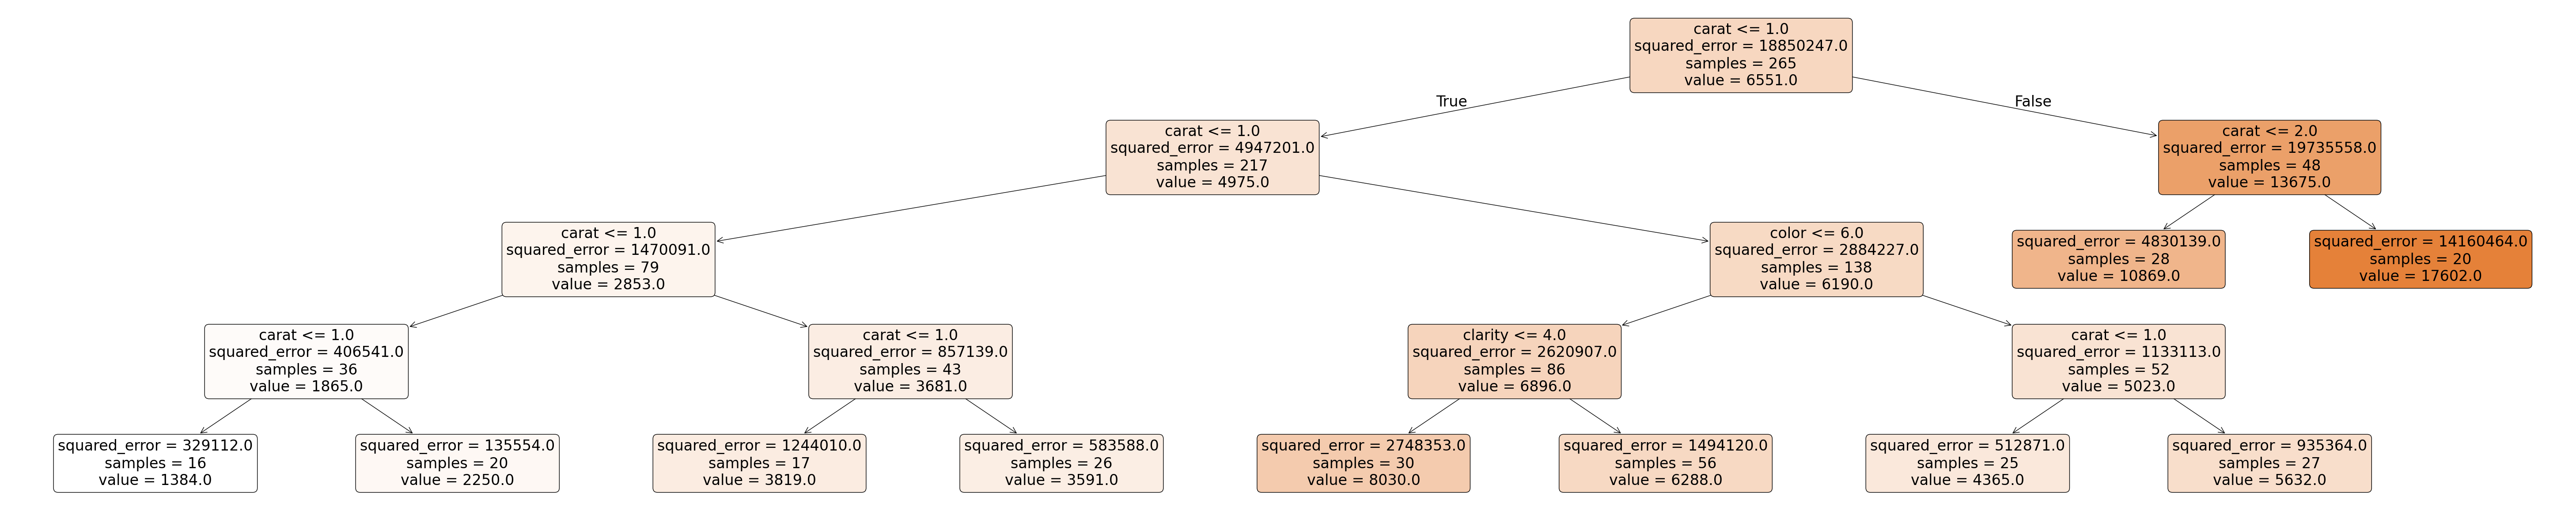

In [76]:
# setting figure size
plt.figure(figsize=(75, 15))


# developing a plotted tree
plot_tree(decision_tree = model,
          feature_names = x_train.columns,
          filled        = True,
          rounded       = True,
          fontsize      = 24,
          precision     = 0)


# saving the visual as .png file
plt.savefig("./analysis_images/pruned tree.png")

# rendering the plot
plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

CART models have an amazing tool to help evaluate feature performance. This tool, known as <strong>feature importance</strong>, informs as to how "important" each feature is in terms of splitting the data into nodes. Run the user-defined function below to see the results of this tool.

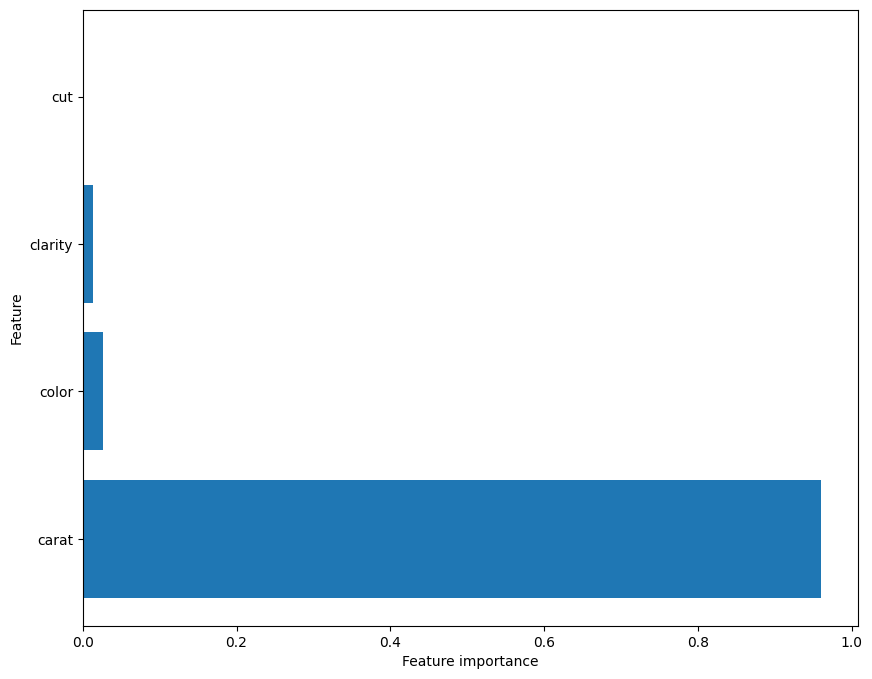

In [77]:
# plotting feature importance
plot_feature_importances(model,
                         train = x_train,
                         export = False)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part III: Further Analysis</h2><br>
Adjust the code as necessary and rerune the cells above to complete the following tasks.

<strong>a) Develop a regression tree using only the base features.</strong><br>
How did the model perform? What new insights have you discovered?

<br>

<strong>b) Develop a regression tree using only <em>carat</em> and <em>color</em>.</strong><br>
Were the results the same as when using all of the x-features?

<br>

<strong>c) Develop a regression tree using all features except <em>carat</em> and <em>color</em>.</strong><br>
How did the model perform? What new insights have you discovered?

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part IV: Case Study - Breaking Down the "Best" Diamond on a Budget</h2><br>

<strong>Your goal in this part of the case study is to break down diamond prices using a regression tree.</strong> For this exercise, we will increase the price limit to $7,250. A higher budget will benefit our modeling endeavors in two important ways:

1. Since the terminal nodes use the average price of their samples to make predictions, going over budget will help prevent the regression tree from having zero terminal nodes with a value near $5,795.
2. We will have more samples in the training and testing sets, improving model stability.

<br>
<strong>a) Complete the code cells below to develop a regression tree where price $\leq$ 7250.</strong><br>
Then, analyze the results. How would you articulate your insights to someone wanting to buy a diamond engagement ring?

In [88]:
## x-side ##
x_budget = diamonds[ diamonds['price']<=7250 ].drop(labels = 'price', axis = 1)

## y-side ##
y_budget = diamonds[ diamonds['price']<=7250]['price']

<br>

In [89]:
# x-data
x_data = x_budget

# y_data
y_data = y_budget

# train-test split
x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                    y_data,
                                                    test_size = 0.35,
                                                    random_state = 702)


# checking results
print(f"""
Data Shapes
-----------
x_train: {x_train.shape}
y_train: {y_train.shape}

x_test:  {x_test.shape}
y_test:  {y_test.shape}
""")


Data Shapes
-----------
x_train: (185, 6)
y_train: (185,)

x_test:  (101, 6)
y_test:  (101,)



<br>

In [90]:
# naming the model
model_name = 'Best Diamonds'

# INSTANTIATING a model object - CHANGE THIS AS NEEDED
model = DecisionTreeRegressor(max_depth        = 5,
                              min_samples_leaf = 6,
                              random_state     = 702)


# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train) # using R-square
model_test_score  = model.score(x_test, y_test)   # using R-square
model_gap         = abs(model_train_score - model_test_score)


# displaying results
print('Training Score :', round(model_train_score, ndigits = 4))
print('Testing Score  :', round(model_test_score, ndigits = 4))
print('Train-Test Gap :', round(model_gap, ndigits = 4))

Training Score : 0.8628
Testing Score  : 0.8254
Train-Test Gap : 0.0375


<br>

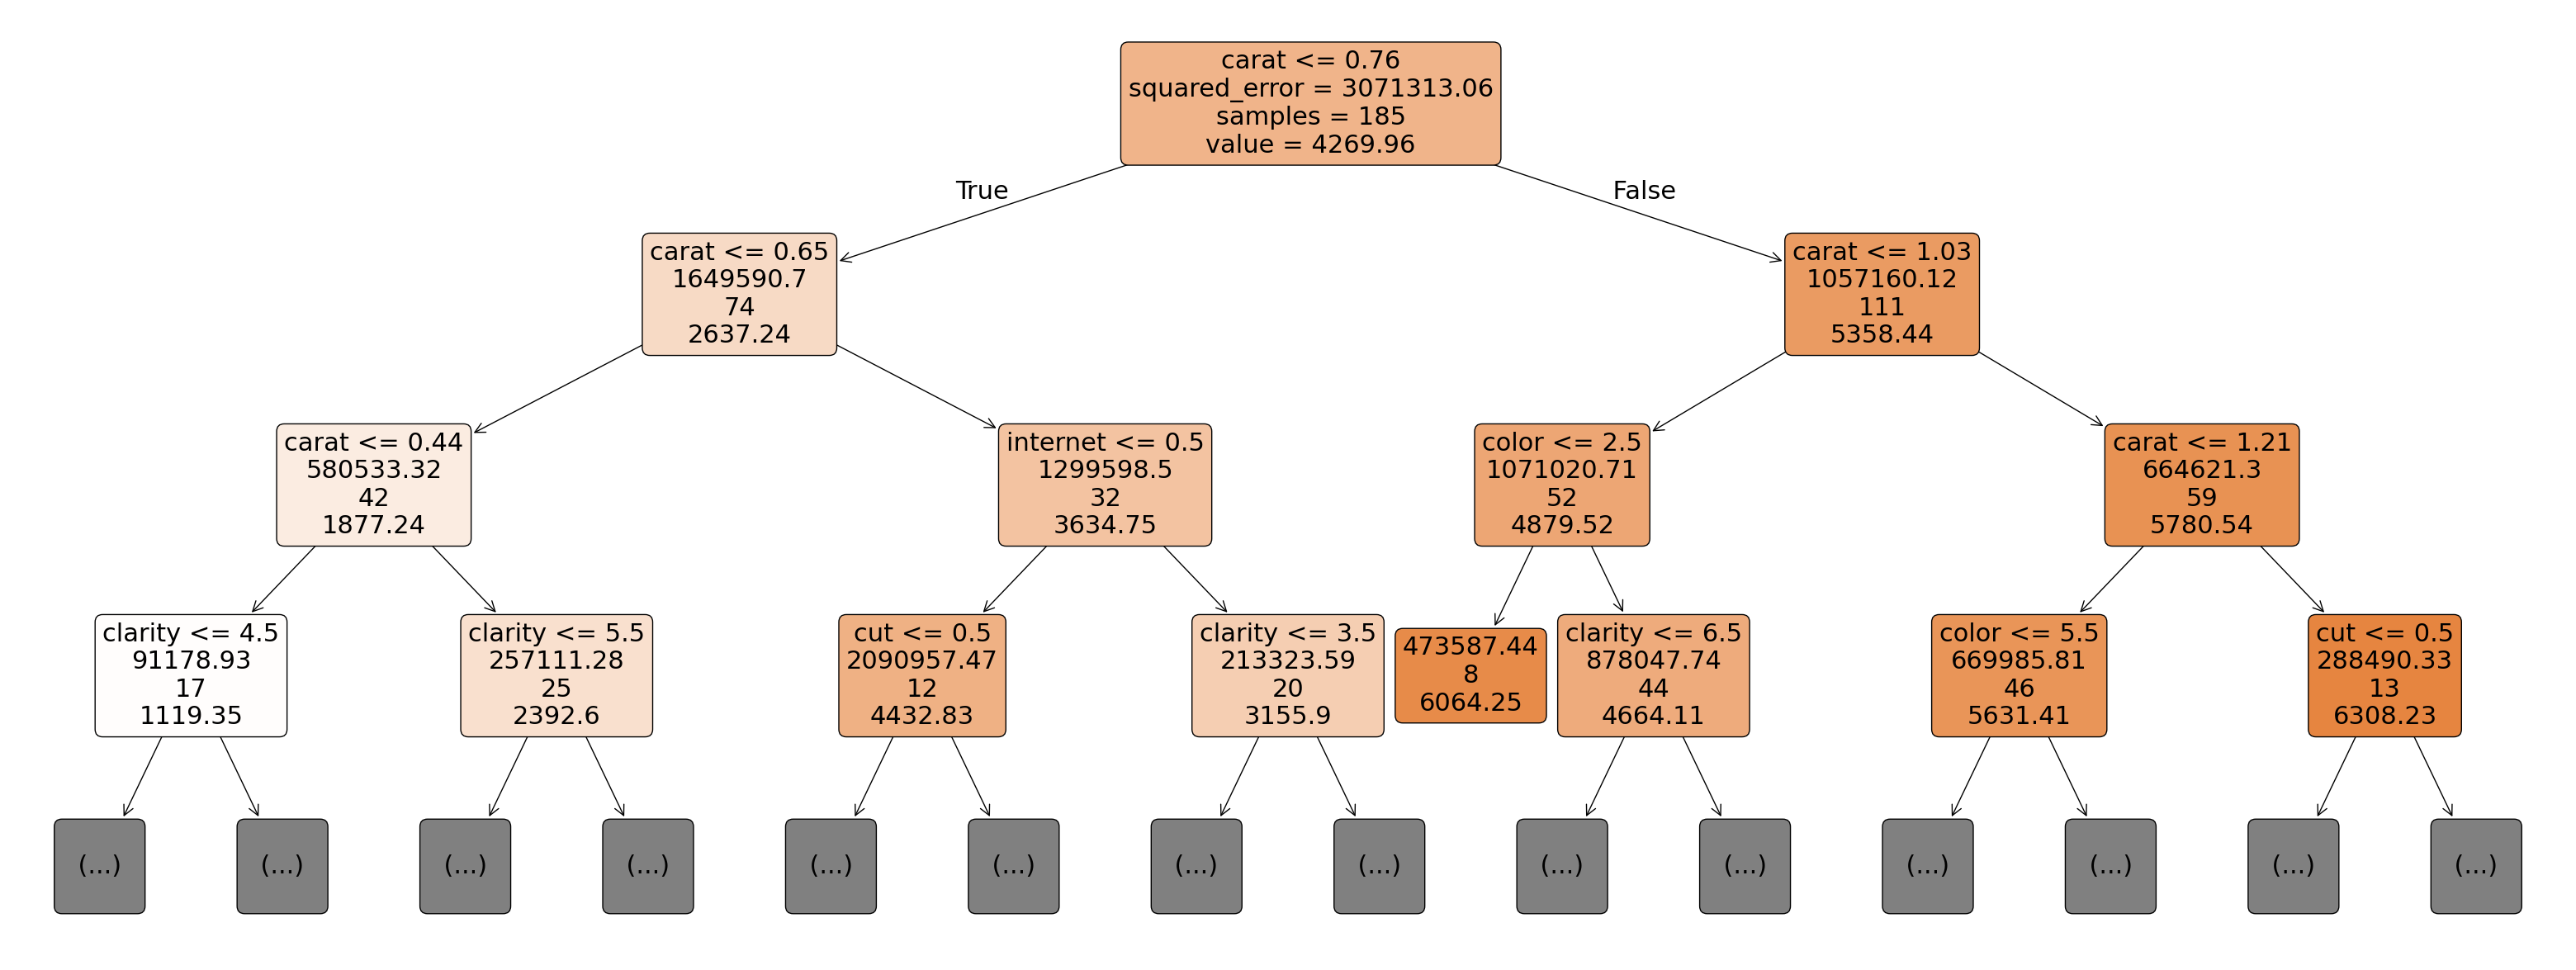

In [100]:
# setting figure size
plt.figure(figsize=(40, 15)) # adjust this as needed


# developing a plotted tree
plot_tree(decision_tree = model, # changing to pruned_tree_fit
          feature_names = x_train.columns,
          filled        = True,
          rounded       = True,
          fontsize      = 22,
          max_depth     =3, # restricting to see better
          label         = 'root', # optional asthetics
          precision     = 2)


# rendering the plot
plt.show()

In [98]:
df = pd.DataFrame(model.predict(x_train))
df[df[0]<=5130][df[0]>=5129]

/tmp/ipython-input-2629508470.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df[0]<=5130][df[0]>=5129]


,0
11,5129.388889
19,5129.388889
42,5129.388889
50,5129.388889
55,5129.388889
56,5129.388889
80,5129.388889
105,5129.388889
106,5129.388889
108,5129.388889


In [101]:
########
# I can write what I want toe xplain in my code like this in my assignment
#
#
#
#######

<br>

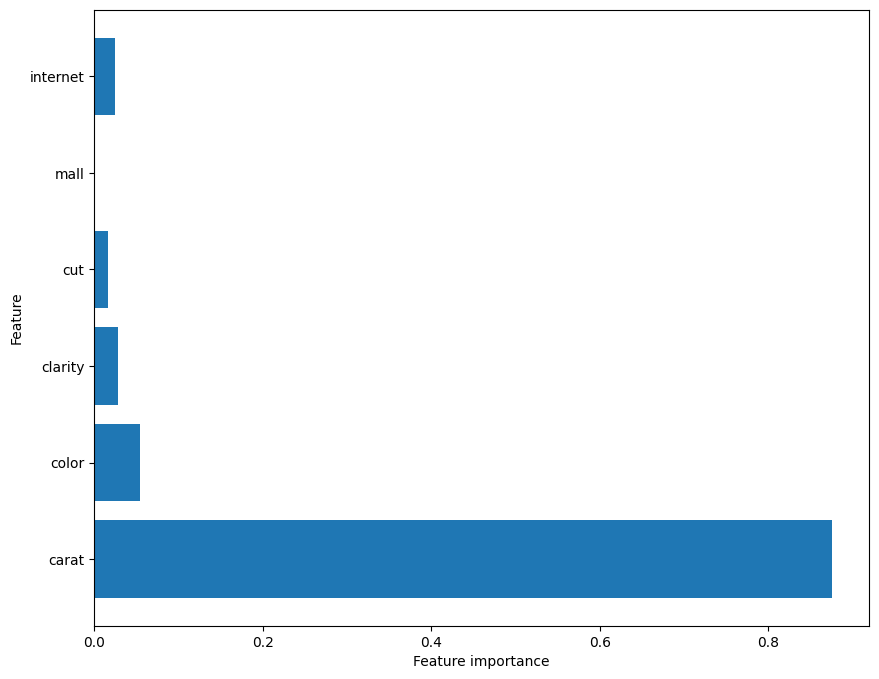

In [94]:
# plotting feature importance
plot_feature_importances(model,
                         train = x_train,
                         export = False)

<br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

~~~
      ___  ___  __                 
|__/ |__  |__  |__)                
|  \ |___ |___ |                   
                                   
 __   __   __               __    /
/ _` |__) /  \ |  | | |\ | / _`  /
\__> |  \ \__/ |/\| | | \| \__> .  



~~~

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br>